<a href="https://colab.research.google.com/github/shilphypg/DSA_ICTAK/blob/main/ShilphyPGonsalvez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [218]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

In [219]:
# To read the file
df=pd.read_csv('/content/car_age_price.csv')
df

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [220]:
#to get the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [221]:
#to get the total number of rows and columns of the data
df.shape

(112, 2)

In [222]:
#to get the first 5 values of the datagrame
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [223]:
#to get the last 5 values of the datagrame
df.tail()

,Year,Price
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000
111,2015,425000


### Exploratory Data Analysis (EDA)

In [224]:
#to get the statistical parameters of the given dataset
df.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [225]:
 #to check for null values
 #method1
 df.isna().sum()

Year     0
Price    0
dtype: int64

In [226]:
 #to check for null values
 #method2
 df.isnull().sum()

Year     0
Price    0
dtype: int64

In [227]:
#check for unique values
df.nunique()

Year      8
Price    35
dtype: int64

In [228]:
df['Year'].unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014])

In [229]:
df['Price'].unique()

array([465000, 755000, 700000, 350000, 425000, 575000, 509999, 500000,
       600000, 475000, 550000, 434999, 650000, 450000, 486000, 545000,
       525000, 396000, 325000, 345000, 341000, 490000, 540000, 595000,
       495000, 400000, 300000, 320000, 409999, 390000, 480000, 520000,
       640000, 375000, 420000])

In [230]:
#to get the correlation data
df.corr()

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


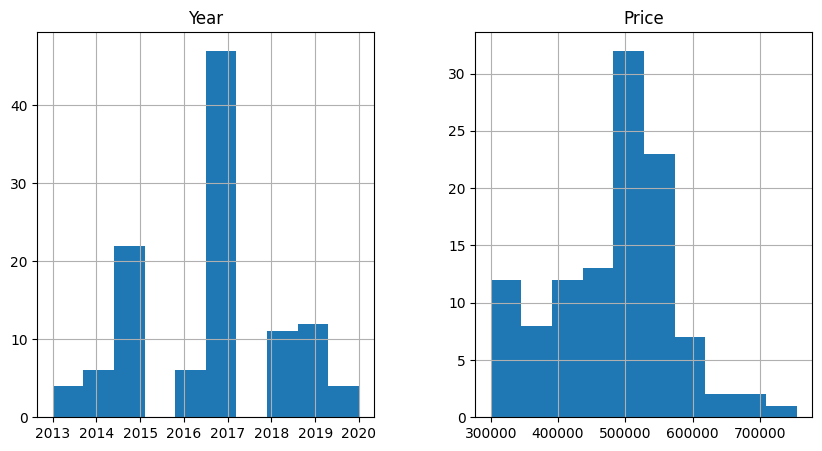

In [231]:
#to plot the histogram for data analysis
df.hist(figsize=(10,5))
plt.show()

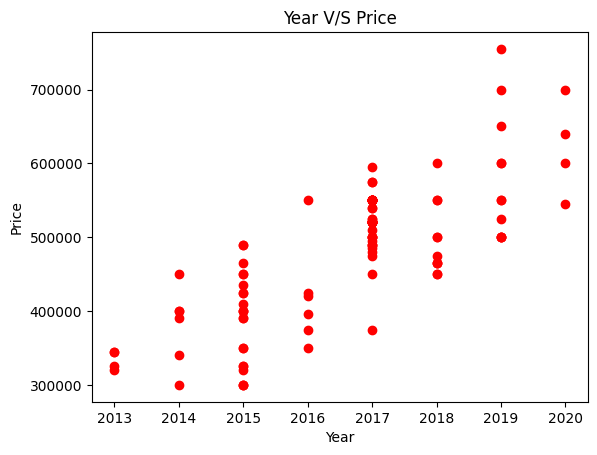

In [232]:
#creating a scatter plot of  Year V/S Price
plt.scatter(df['Year'],df['Price'],color='red')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Year V/S Price')
plt.show()

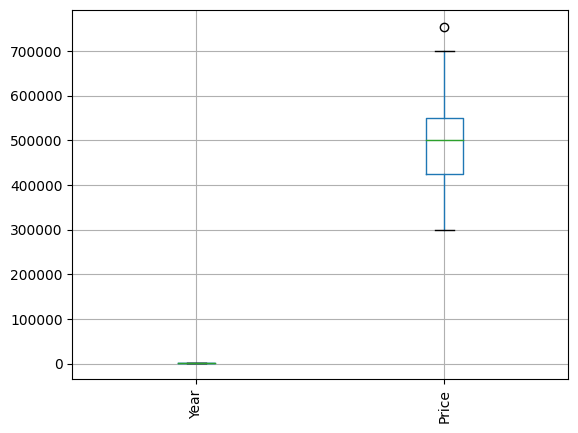

In [233]:
df.boxplot()
plt.xticks(rotation=90)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

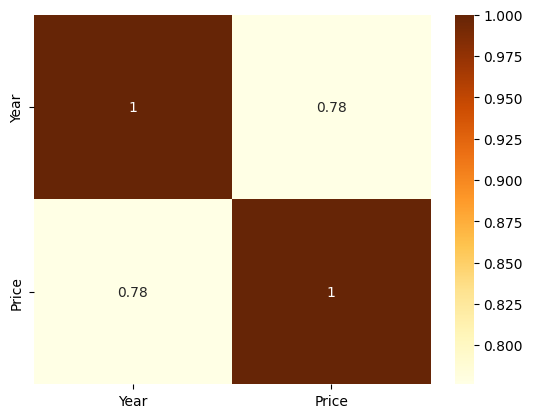

In [234]:
#to visualize this correlation as a heatmap
#https://seaborn.pydata.org/tutorial/color_palettes.html
corrmatrix=df.corr()
sns.heatmap(corrmatrix,annot=True,cmap='YlOrBr')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

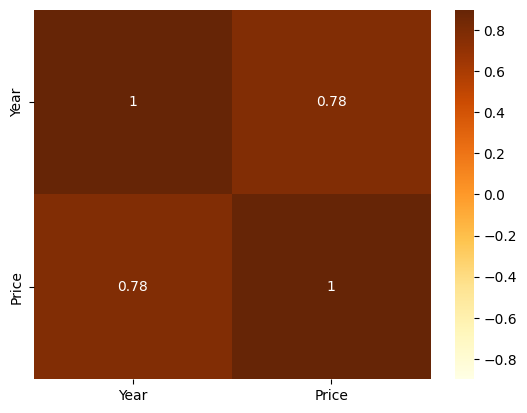

In [235]:
#to visualize this correlation as a heatmap
#https://seaborn.pydata.org/tutorial/color_palettes.html
corrmatrix=df.corr()
sns.heatmap(corrmatrix,vmin=-0.9,vmax=0.9,annot=True,cmap='YlOrBr')
plt.show

In [236]:
df.columns

Index(['Year', 'Price'], dtype='object')

### Data Preprocessing

In [237]:
y=df['Price']
x=df.drop('Price',axis=1)

In [238]:
x.head()

,Year
0,2018
1,2019
2,2019
3,2018
4,2018


In [239]:
y.head()

0    465000
1    755000
2    700000
3    465000
4    465000
Name: Price, dtype: int64

In [240]:
#train test split x_train given to machine to study, y_train its answer,x_test is the question to machine
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [241]:
x_train

,Year
66,2017
90,2017
62,2017
22,2015
85,2015
...,...
106,2015
14,2017
92,2017
51,2018


In [242]:
y_train

66     525000
90     520000
62     540000
22     434999
85     320000
        ...  
106    300000
14     475000
92     520000
51     550000
102    350000
Name: Price, Length: 89, dtype: int64

In [243]:
x_train.shape

(89, 1)

In [244]:
df.shape

(112, 2)

In [245]:
y_train.shape

(89,)

In [246]:
x_test

,Year
40,2019
65,2017
4,2018
47,2018
42,2018
69,2015
26,2017
11,2018
10,2019
44,2019


In [247]:
x_test.shape

(23, 1)

In [248]:
y_test.shape

(23,)

### Linear Regression Model

In [249]:
#model creation
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [250]:
model=lr.fit(x_train,y_train)

In [251]:
y_pred=model.predict(x_test)

In [252]:
y_pred

array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [253]:
#evaluating the model
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mse

4326906256.829671

In [254]:
#r2_score(y_test,y_pred_sc)
r2=r2_score(y_test,y_pred)
r2

0.36759313425902185

### Lasso Regression Model

In [260]:
#lasso regression(Least Absolute and Selection operator)
#Import Required Libraries:
from sklearn.linear_model import Lasso

In [266]:
#Initialize and Fit the Model:
lo=Lasso(alpha=1.0)
lo.fit(x_train,y_train)

Lasso()

In [267]:
#Predict on Test Set:
y_pred_lo=lo.predict(x_test)

In [268]:
#Calculate Performance Metrics:
mse_lo = mean_squared_error(y_test, y_pred_lo)
mse_lo

4326859771.015669

In [269]:
r2_lo = r2_score(y_test, y_pred_lo)
r2_lo

0.3675999284778446

###Price Prediction for 2022 Model

In [270]:
#Using the Linear Regression Model:
predicted_price_in_the_year_2022=model.predict([[2022]])
predicted_price_in_the_year_2022

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([743601.61594504])

In [271]:
#Using the Lasso Regression Model:
predicted_price_2022_lo = lo.predict([[2022]])
predicted_price_2022_lo

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([743599.37427144])

### Compare Model Performance

In [272]:
print(f"Linear Regression MSE: {mse}, R2: {r2}")
print(f"Lasso Regression MSE: {mse_lo}, R2: {r2_lo}")

Linear Regression MSE: 4326906256.829671, R2: 0.36759313425902185
Lasso Regression MSE: 4326859771.015669, R2: 0.3675999284778446


### Print Predicted Prices for 2022 Model:

In [274]:
print(f"Predicted price for 2022 model using Linear Regression: {predicted_price_in_the_year_2022[0]}")
print(f"Predicted price for 2022 model using Lasso Regression: {predicted_price_2022_lo[0]}")

Predicted price for 2022 model using Linear Regression: 743601.6159450412
Predicted price for 2022 model using Lasso Regression: 743599.3742714375


In [275]:
if mse<mse_lo:
  print("Linear Regression is better")
else:
  print("Lasso Regression is better")

Lasso Regression is better
